# `ds2s_OV_x0`のパラメータ色々変えて基本図描く

In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sys

In [25]:
from ds2s_OV_x0 import ds2s_OV_x0

In [26]:
def plot_pattern(ax, model, ni, nf):
    ax.set_xlabel("Time")
    ax.set_ylabel("Location of Vehicles")
    ax.set_xlim((0, 100))
    ax.set_ylim((0, 10))
    x = np.array([[j for i in range(model.K)] for j in range(ni, nf+1)]) \
        .flatten()
    y = model.x[ni:nf+1, :model.K].flatten()
    ax.scatter(x, y, s=1)


def plot_flow(ax, model, ni, nf):
    ax.set_xlabel("Time")
    ax.set_ylabel("Flow")
    ax.set_xlim((ni, nf))
    ax.set_ylim((0, 1.0))
    ax.set_title(
        "L={}, K={}, n0={}, x0={}, v0={}, dt={}, dx={}"
        .format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
    )
    x = np.array([i for i in range(nf - ni + 1)])
    y = np.array([model.flow(0, i) for i in range(ni, nf + 1)])
    ax.plot(x, y)

def plot_fundamental(ax, model, density, flow):
    ax.set_xlabel("Density")
    ax.set_ylabel("Flow")
    ax.set_xlim((0, 1.0))
    ax.set_ylim((0, 1.0))
    ax.set_title(
        "L={}, K={}, n0={}, x0={}, v0={}, dt={}, dx={}"
        .format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt, model.dx)
    )
    ax.scatter(density, flow, s=3)

In [27]:
L = 10.0
n_0 = 5
x_0 = 0.1
v_0 = 0.7
dt = 1.0
dx = 1.0

## $n_0$を変えてみる

K =  100

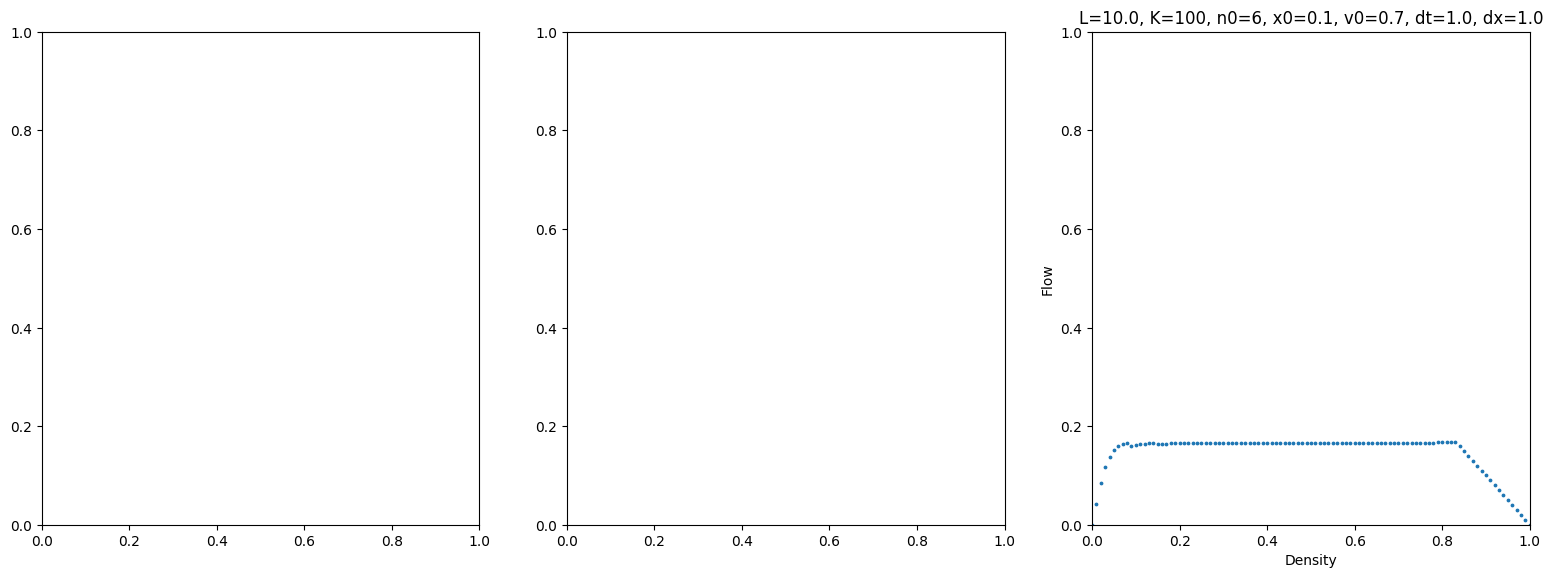

In [32]:
# for n_0_ in range(1, 11):
fig = plt.figure(figsize=(6.4 * 3, 6.4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

density = []
flow = []

for K in range(101):
	sys.stdout.write("\rK = {:4d}".format(K))
	sys.stdout.flush()
	x_init = np.array(sorted(random.sample([0.1 * i for i in range(100)], K)))
	model = ds2s_OV_x0(
		L=L,
		K=K,
		n_0=n_0_,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_init=x_init,
		n_max=1010
	)
	model.simulate()
	density.append(model.density())
	flow.append(model.flow(800, 1000))
if K == 50:
	plot_pattern(ax1, model, 0, 100)
	plot_flow(ax2, model, 0, 1000)
plot_fundamental(ax3, model, density, flow)
# fig